Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "st122802"
ID = "Ayush Koirala"

---

# Lab 03: Logistic Regression

Thus far, the problems we've encountered have been *regression* problems, in which the target $y \in \mathbb{R}$.

Today we'll start experimenting with *classification* problems, beginning with *binary* classification problems, in which the target $y \in \{ 0, 1 \}$.

## Background

The simplest approach to classification, applicable when the input feature vector $\mathbf{x} \in \mathbb{R}^n$, is a simple generalization of what we
do in linear regression. Recall that in linear regression, we assume that the target is drawn from a Gaussian distribution whose mean is a linear function
of $\mathbf{x}$:

$$ y \sim {\cal N}(\theta^\top \mathbf{x}, \sigma^2) $$

In logistic regression, similarly, we'll assume that the target is drawn from a Bernoulli distribution with parameter $p$ being the probability of
class 1:

$$ y \sim \text{Bernoulli}(p) $$

That's fine, but how do we model the parameter $p$? How is it related to $\mathbf{x}$?

In linear regression, we assume that the mean of the Gaussian is $\theta^\top \mathbf{x}$, i.e., a linear function of $\mathbf{x}$.

In logistic regression, we'll assume that $p$ is a "squashed" linear function of $\mathbf{x}$, i.e.,

$$ p = \text{sigmoid}(\theta^\top \mathbf{x}) = g(\theta^\top \mathbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}. $$

Later, when we introduce generalized linear models, we'll see why $p$ should take this form. For now, though, we can simply note that the selection makes
sense. Since $p$ is a discrete probability, $p$ is bounded by $0 \le p \le 1$. The sigmoid function $g(\cdot)$ conveniently obeys these bounds:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

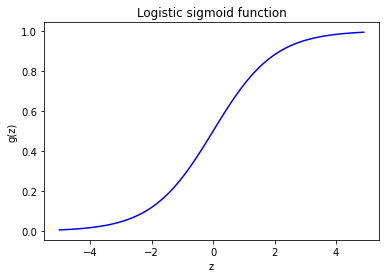

In [ ]:
z = np.arange(-5, 5, 0.1)
plt.plot(z, sigmoid(z), 'b-')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Logistic sigmoid function')
plt.show()

We see that the sigmoid approaches 0 as its input approaches $-\infty$ and approaches 1 as its input approaches $+\infty$. If its input is 0, its value is 0.5.

Again, this choice of function may seem strange at this point, but bear with it! We'll derive this function from a more general principle, the generalized
linear model, later.

OK then, we now understand that for logistic regression, the assumptions are:

1. The *data* are pairs $(\textbf{x}, y) \in \mathbb{R}^n \times \{ 0, 1 \}$.
1. The *hypothesis function* is $h_\theta(\textbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}$.

What else do we need... ? A cost function and an algorithm for minimizing that cost function!

## Cost function for logistic regression

You can refer to the lecture notes to see the derivation, but for this lab, let's just skip to the chase.
With the hypothesis $h_\theta(\mathbf{x})$ chosen as above, the log likelihood function $\ell(\theta)$ can be derived as
$$ \ell(\theta) = \log {\cal L}(\theta) =  \sum_{i=1}^{m}y^{(i)}\log(h_{\theta}(\mathbf{x}^{(i)})) + (1 - y^{(i)})\log(1 - (h_{\theta}(\mathbf{x}^{(i)})) .$$

Negating the log likelihood function to obtain a loss function, we have

$$ J(\theta) = - \sum_{i=1}^m y^{(i)}\log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-h_\theta(\textbf{x}^{(i)})) .$$

There is no closed-form solution to this problem like there is in linear regression, so we have to use gradient descent to find $\theta$ minimizing $J(\theta)$.
Luckily, the function *is* convex in $\theta$ so there is just a single global minimum, and gradient descent is guaranteed to get us there eventually if we take
the right step size.

The *stochastic* gradient of $J$, for a single observed pair $(\mathbf{x}, y)$, turns out to be (see lecture notes)

$$\nabla_J(\theta) = (h_\theta(\mathbf{x}) - y)\mathbf{x} .$$

Give some thought as to whether following this gradient to increase the loss $J$ would make a worse classifier, and vice versa!

Finally, we obtain the update rule for the $j^{th}$ iteration selecting training pattern $i$:

$$ \theta^{(j+1)} \leftarrow \theta^{(j)} + \alpha(y^{(i)} - h_\theta(\textbf{x}^{(i)}))\textbf{x}^{(i)} .$$ 

Note that we can perform *batch gradient descent* simply by summing the single-pair gradient over the entire training set before taking a step,
or *mini-batch gradient descent* by summing over a small subset of the data.

## Example dataset 1: student admissions data

This example is from Andrew Ng's machine learning course on Coursera.

The data contain students' scores for two standardized tests and an admission decision (0 or 1).


In [ ]:
# Load student admissions data.
data = np.loadtxt('ex2data1.txt',delimiter = ',')

exam1_data = data[:,0]
exam2_data = data[:,1]
X = np.array([exam1_data, exam2_data]).T
y = data[:,2]

# Output some sample data

print('Exam scores', X[0:5,:])
print('-----------------------------')
print('Admission decision', y[0:5])

Exam scores [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
-----------------------------
Admission decision [0. 0. 0. 1. 1.]


Let's plot the data...

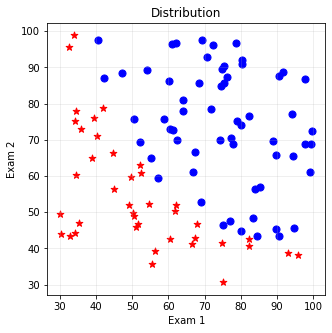

In [ ]:
# Plot the data
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5, 5)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Distribution')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(exam1_data[idx_0], exam2_data[idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(exam1_data[idx_1], exam2_data[idx_1], s=50, c='b', marker='o', label='Admitted')
plt.show()

Let's see if we can find good values for $\theta$ without normalizing the data.
We will definitely want to split the data into train and test, however...

In [ ]:
import random
random.seed(12)

# Partion data into training and test datasets
m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
#print(XX)
y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

### All important functions are here
- Sigmoid function
- Hypothesis function
- Gradient function
- Cost $j$ and gradient function

In [ ]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

### Initialize theta

In [ ]:
# Get a feel for how h works
theta_initial = np.zeros((n+1, 1))

print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', y[0:5,:])

Initial theta: [[0.]
 [0.]
 [0.]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Batch training function for num_iters iterations

In [ ]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

### Train data

In [ ]:
# Train for 3000 iterations on full training set
alpha = .0005
num_iters = 1000000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[-11.29380461]
 [  0.10678604]
 [  0.07994591]]
Cost with optimized theta: 0.24972975869900035


### Plot graph

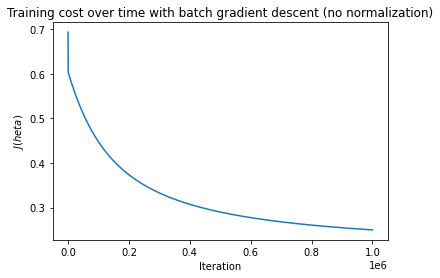

In [ ]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### In-lab exercise from example 1 (Total 35 points)

That took a long time, right?

See if you can do better. 

1. Try increasing the learning rate $\alpha$ and starting with a better initial $\theta$. How much does it help?
   - Try at least 2 learning rate $\alpha$ with 2 difference $\theta$ (4 experiments)
   - Do not forget to plot the graph to compare youre results

2. Better yet, try *normalizing the data* and see if the training converges better. How did it go? 
   - Do not forget to plot the graph to compare youre results between unnormalized and normalized data.

3. Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.




### Exercise 1.1 (5 points)

Fill $\alpha$ and $\theta$

In [ ]:
# grade task: change 'None' value to number(s) or function
# YOUR CODE HERE
#raise NotImplementedError()
# declare your alphas
alpha1 = .0005
alpha2 = .0001

# initialize thetas as you want
theta_initial1 = np.array([0,0,0]).reshape(n+1,1)
theta_initial2 = np.array([5,5,5]).reshape(n+1,1)

# define your num iterations
num_iters = 1000

In [ ]:
alpha_list = [alpha1, alpha2]
print('alpha 1:', alpha1)
print('alpha 2:', alpha2)

theta_initial_list = [theta_initial1, theta_initial2]
print('theta 1:', theta_initial_list[0])
print('theta 2:', theta_initial_list[1])

print('Use num iterations:', num_iters)

# Test function: Do not remove
assert alpha_list[0] is not None and alpha_list[1] is not None, "Alpha has not been filled"
chk1 = isinstance(alpha_list[0], (int, float))
chk2 = isinstance(alpha_list[1], (int, float))
assert chk1 and chk2, "Alpha must be number"
assert theta_initial_list[0] is not None and theta_initial_list[1] is not None, "initialized theta has not been filled"
chk1 = isinstance(theta_initial_list[0], (list,np.ndarray))
chk2 = isinstance(theta_initial_list[1], (list,np.ndarray))
assert chk1 and chk2, "Theta must be list"
chk1 = ((n+1, 1) == theta_initial_list[0].shape)
chk2 = ((n+1, 1) == theta_initial_list[1].shape)
assert chk1 and chk2, "Theta size are incorrect"
assert num_iters is not None and isinstance(num_iters, int), "num_iters must be integer"
print("success!")
# End Test function

alpha 1: 0.0005
alpha 2: 0.0001
theta 1: [[0]
 [0]
 [0]]
theta 2: [[5]
 [5]
 [5]]
Use num iterations: 1000
success!


### Exercise 1.2 (5 points)

Train data

In [ ]:
# grade task: change 'None, None' value to number(s) or function
j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
        #raise NotImplementedError()
        theta_i, j_history_i =  train(X_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)

<ipython-input-7-a7b4ef539c0f>:12: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
<ipython-input-7-a7b4ef539c0f>:12: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))


In [ ]:
# Test function: Do not remove
assert theta_list[0] is not None and j_history_list[0] is not None, "No values in theta_list or j_history_list"
chk1 = isinstance(theta_list[0], (list,np.ndarray))
chk2 = isinstance(j_history_list[0][0], (int, float))
assert chk1 and chk2, "Wrong type in theta_list or j_history_list"
print("success!")
# End Test function

success!


### Exercise 1.3 (10 points)

Plot graph

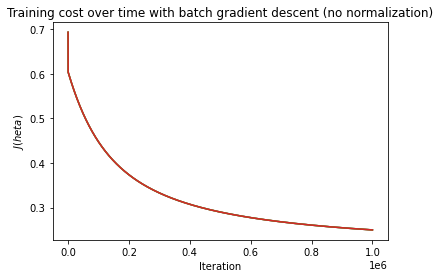

In [ ]:
# YOUR CODE HERE
#raise NotImplementedError()
for j_histroy in j_history_list:
    plt.plot(j_history)
    plt.xlabel("Iteration")
    plt.ylabel("$J(\theta)$")
    plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### Exercise 1.4 (10 points)

- Repeat your training, but **normalized data** before run training
- Compare the results between **normalized data** and **unnormalized data**

In [ ]:
# code here
def normalized_data(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    return (data - means) / stds
X_norm = normalized_data(X)


#....
m, n = X_norm.shape
X_norm = np.insert(X_norm,0,1,axis=1)
#print(XX)
y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_norm_train = X_norm[train_idx,:];
X_norm_test = X_norm[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

In [ ]:
print(X_norm_train[:5])

[[ 1.          0.08651467  0.01986816]
 [ 1.         -0.52488391 -1.65775547]
 [ 1.          1.25003483 -1.12840052]
 [ 1.         -0.07578684  0.7942862 ]
 [ 1.          0.48393864 -1.92641626]]


In [ ]:
alpha = .0005
num_iters = 1000000
theta, j_history = train(X_norm_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[1.965954  ]
 [4.02145796]
 [4.58116762]]
Cost with optimized theta: 0.1946655681991489


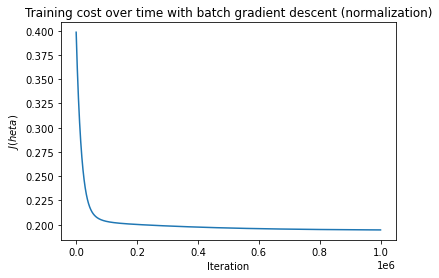

In [ ]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (normalization)")
plt.show()

alpha 1: 0.0005
alpha 2: 0.0001
theta 1: [[0]
 [0]
 [0]]
theta 2: [[5]
 [5]
 [5]]
Use num iterations: 1000


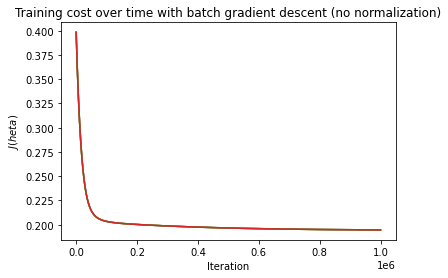

In [ ]:
alpha1 = .0005
alpha2 = .0001

# initialize thetas as you want
theta_initial1 = np.array([0,0,0]).reshape(n+1,1)
theta_initial2 = np.array([5,5,5]).reshape(n+1,1)

# define your num iterations
num_iters = 1000
alpha_list = [alpha1, alpha2]
print('alpha 1:', alpha1)
print('alpha 2:', alpha2)

theta_initial_list = [theta_initial1, theta_initial2]
print('theta 1:', theta_initial_list[0])
print('theta 2:', theta_initial_list[1])

print('Use num iterations:', num_iters)

j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
        #raise NotImplementedError()
        theta_i, j_history_i = train(X_norm_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)
        
for j_histroy in j_history_list:
    plt.plot(j_history)
    plt.xlabel("Iteration")
    plt.ylabel("$J(\theta)$")
    plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### Exercise 1.5 (5 points)

Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

**Normalization**
we can see from the comparison between the final costs with optimized theta for normalized vs non-normalized data our final non-normalized costs are way higher i.e 0.249 than the normalized (0.0926) on even after 10,00,000 iterations. Though we can say that our models with learning rate of 0.0005 have still not converged even for normalized data as the costs are slightly higher than when we used the learning rate of 0.001

**Learning Rate**
The log(0) problem was occurring on the non-normalized dataset when the learning rate was set too high. For faster convergence, we also require a higher learning rate. The higher learning rate functioned correctly and produced results more quickly for normalized data. However, we might be unable to use a higher learning rate with normal data.

**Initial theta**
The plots and final cost show that theta value differences make very small differences in our training, especially when our learning rate is high enough. A difference in theta value appears to cause our model to converge at a slightly different pace for a very small learning rate, which is only slightly more noticeable than with a higher learning rate.

### Decision boundary

Note that when $\theta^\top \textbf{x} = 0$, we have $h_\theta(\textbf{x}) = 0.5$. That is, we are
equally unsure as to whether $\textbf{x}$ belongs to class 0 or class 1. The contour at which
$h_\theta(\textbf{x}) = 0.5$ is called the classifier's *decision boundary*.

We know that in the plane, the equation $$ax+by+c=0$$ is the general form of a 2D line. In our case, we have
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ as our decision boundary, but clearly, this is just a 2D line
in the plane. So when we plot $x_1$ against $x_2$, it is easy to plot the boundary line.

In [ ]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

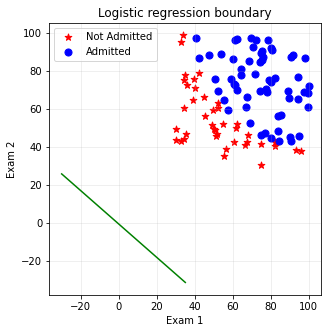

In [ ]:
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X, theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()


You'll have to adjust the above code to make it work with normalized data.

### Test set performance

Now let's apply the learned classifier to the test data we reserved in the beginning:


In [ ]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [ ]:
y_test_pred_soft = h(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 -1.1053, hard R^2 -1.1053, accuracy 0.47


For classification, accuracy is probably the more useful measure of goodness of fit.

## Example 2: Loan prediction dataset

Let's take another example dataset and see what we can do with it.

This dataset is from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset).

The data concern loan applications. It has 12 independent variables, including 5 categorical variables. The dependent variable is the decision "Yes" or "No" for extending a loan to an individual who applied.

One thing we will have to do is to clean the data, by filling in missing values and converting categorical data to reals.
We will use the Python libraries pandas and sklearn to help with the data cleaning and preparation.

### Read the data and take a look

In [ ]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed

import pandas as pd

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [ ]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Handle missing values

We can see from the above table that the `Married` column has 3 missing values in the training dataset and 0 missing values in the test dataset.
Let's take a look at the distribution over the datasets then fill in the missing values in approximately the same ratio.

You may be interested to look at the [documentation of the Pandas `fillna()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). It's great!

In [ ]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Now the number of examples missing the `Married` attribute is 0.

Excercise: Complete the data processing based on examples given and logistic regression model on training dataset. Estimate the Accuracy (goodness of fit) on test dataset.

In [ ]:
# Another example of filling in missing values for the "number of dependents" attribute.
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Once missing values are filled in, you'll want to convert strings to numbers.

Finally, here's an example of replacing missing values for a numeric attribute. Typically, we would use the mean of the attribute over the training set. 

In [ ]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


## Take-home exercise (65 points)

Using the data from Example 2 above, finish the data cleaning and
preparation. Build a logistic regression model based on the
cleaned dataset and report the accuracy on the test and training sets.

- Setup X and Y data (10 points)
- Train data and return theta and J value. Find the good $\alpha$ and you may normalized data before train. (30 points)
- Use $\theta$ and implement in test set. (10 points)
- Summarize what did you do and how to find the best result in this take home exercise. (15 points)

## To turn in

Turn in a brief report in the form of a Jupyter notebook explaining what
you did for the in-lab exercise and the take-home exercise. Discuss what
you learned in terms of normalization and data cleaning and the results
you obtained.


In [ ]:

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


As we can see that there is missing values in both training and testing dataset. We have missing values in Gender, Self_Employed,  Loan_Amount_Term, and credit_History in both training data and testing data. So, we need to fix this

In [ ]:

def fill_gender(data,male_num , female_num):        
    data['Gender'].fillna('Male', inplace = True, limit = male_num)
    data['Gender'].fillna('Female', inplace = True, limit = female_num)  



In [ ]:
print(data_train['Gender'].value_counts())

gender_train = data_train['Gender'].value_counts()
gender_train_ratio = gender_train[0]/sum(gender_train.values)
print("Male Gender ratio",gender_train_ratio)

empty_gender_train = (data_train['Gender'].isnull().sum())
print("Empty values:",empty_gender_train)

male_num_train = int(round(gender_train_ratio*empty_gender_train))
print(f"\n Filling {male_num_train} male values and {empty_gender_train - male_num_train} female values")
fill_gender(data_train, male_num_train, empty_gender_train - male_num_train)
print("gender", data_train['Gender'].value_counts())

print("Missing values for train data:\n...........\n",data_train.isnull().sum())

Male      489
Female    112
Name: Gender, dtype: int64
Male Gender ratio 0.8136439267886856
Empty values: 13

 Filling 11 male values and 2 female values
gender Male      500
Female    114
Name: Gender, dtype: int64
Missing values for train data:
...........
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
print(data_test['Gender'].value_counts())

gender_test = data_test['Gender'].value_counts()
gender_test_ratio = gender_test[0]/sum(gender_test.values)
print("Male Gender ratio",gender_test_ratio)

empty_gender_test = (data_test['Gender'].isnull().sum())
print("Empty values:",empty_gender_test)

male_num_test = int(round(gender_test_ratio*empty_gender_test))
print(f"\n Filling {male_num_test} male values and {empty_gender_test - male_num_test} female values")
fill_gender(data_test, male_num_test, empty_gender_test - male_num_test)
print("gender", data_test['Gender'].value_counts())

print("Missing values for train data:\n...........\n",data_test.isnull().sum())

Male      286
Female     70
Name: Gender, dtype: int64
Male Gender ratio 0.8033707865168539
Empty values: 11

 Filling 9 male values and 2 female values
gender Male      295
Female     72
Name: Gender, dtype: int64
Missing values for train data:
...........
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
def fill_self_employed(data, yes_num , no_num):        
    data['Self_Employed'].fillna('Yes', inplace = True, limit = yes_num)
    data['Self_Employed'].fillna('No', inplace = True, limit = no_num)  

In [ ]:
print(data_train['Self_Employed'].value_counts())

self_employed_train = data_train['Self_Employed'].value_counts()
self_employed_train_ratio = self_employed_train[0]/sum(self_employed_train.values)
print("yes Gender ratio",self_employed_train_ratio)

empty_self_employed_train = (data_train['Self_Employed'].isnull().sum())
print("Empty values:",empty_self_employed_train)

yes_num_train = int(round(self_employed_train_ratio*empty_self_employed_train))
print(f"\n Filling {yes_num_train} yes values and {empty_self_employed_train - yes_num_train} No values")
fill_self_employed(data_train, yes_num_train, empty_self_employed_train - yes_num_train)
print("Self_Employed", data_train['Self_Employed'].value_counts())

print("Missing values for train data:\n...........\n",data_train.isnull().sum())

No     500
Yes     82
Name: Self_Employed, dtype: int64
yes Gender ratio 0.8591065292096219
Empty values: 32

 Filling 27 yes values and 5 No values
Self_Employed No     505
Yes    109
Name: Self_Employed, dtype: int64
Missing values for train data:
...........
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
print(data_test['Self_Employed'].value_counts())

self_employed_test = data_test['Self_Employed'].value_counts()
self_employed_test_ratio = self_employed_test[0]/sum(self_employed_test.values)
print("yes Gender ratio",self_employed_test_ratio)

empty_self_employed_test = (data_test['Self_Employed'].isnull().sum())
print("Empty values:",empty_self_employed_test)

yes_num_test = int(round(self_employed_test_ratio*empty_self_employed_test))
print(f"\n Filling {yes_num_test} yes values and {empty_self_employed_test - yes_num_test} No values")
fill_self_employed(data_test, yes_num_test, empty_self_employed_test - yes_num_test)
print("Self_Employed", data_test['Self_Employed'].value_counts())

print("Missing values for train data:\n...........\n",data_test.isnull().sum())

No     307
Yes     37
Name: Self_Employed, dtype: int64
yes Gender ratio 0.8924418604651163
Empty values: 23

 Filling 21 yes values and 2 No values
Self_Employed No     309
Yes     58
Name: Self_Employed, dtype: int64
Missing values for train data:
...........
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
LoanAmt_Train = data_train['Loan_Amount_Term'].value_counts()
print("Training value counts:\n",LoanAmt_Train)

loan_amount_mean = np.mean(data_train['Loan_Amount_Term'])
print("Mean of loan amount term",loan_amount_mean)

print("Empty Train value for Loan Amount TermL",(data_train['Loan_Amount_Term'].isnull().sum()))
print("Empty Train value for Loan Amount TermL",(data_test['Loan_Amount_Term'].isnull().sum()))

data_train['Loan_Amount_Term'].fillna(loan_amount_mean,inplace=True,limit=14)

data_test['Loan_Amount_Term'].fillna(loan_amount_mean,inplace=True,limit=14)

print("Empty Train value for Loan Amount TermL",(data_train['Loan_Amount_Term'].isnull().sum()))
print("Empty Train value for Loan Amount TermL",(data_test['Loan_Amount_Term'].isnull().sum()))

Training value counts:
 360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Mean of loan amount term 342.0
Empty Train value for Loan Amount TermL 14
Empty Train value for Loan Amount TermL 6
Empty Train value for Loan Amount TermL 0
Empty Train value for Loan Amount TermL 0


In [ ]:
data_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data_train['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
def fill_credit_history(data,one_num,zero_num):
    data['Credit_History'].fillna(1.0,inplace = True, limit = one_num)
    data['Credit_History'].fillna(0.0,inplace = True, limit = zero_num)

In [ ]:
Credit_History_Train = data_train['Credit_History'].value_counts()
Credit_History_Train_Ratio = Credit_History_Train[1]/sum(Credit_History_Train.values)
print("1.0 ratio value:", Credit_History_Train_Ratio)

empty_credit_history_train = (data_train['Credit_History'].isnull().sum())
print("credit card empty value:",empty_credit_history_train)

one_num_train = int(round(Credit_History_Train_Ratio*empty_credit_history_train))
zero_num_train = empty_credit_history_train - one_num_train
print(f"\n filling  {one_num_train} 1.0 value and {empty_credit_history_train-one_num_train} 0.0 value")

fill_credit_history(data_train,one_num_train,zero_num_train)

print("Missing value for train data:",data_train.isnull().sum())

1.0 ratio value: 0.8421985815602837
credit card empty value: 50

 filling  42 1.0 value and 8 0.0 value
Missing value for train data: Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [ ]:
Credit_History_Test = data_test['Credit_History'].value_counts()
Credit_History_Test_Ratio = Credit_History_Test[1]/sum(Credit_History_Test.values)
print("1.0 ratio value:", Credit_History_Test_Ratio)

empty_credit_history_test = (data_test['Credit_History'].isnull().sum())
print("credit card empty value:",empty_credit_history_test)

one_num_test = int(round(Credit_History_Test_Ratio*empty_credit_history_test))
zero_num_test = empty_credit_history_test - one_num_test
print(f"\n filling  {one_num_test} 1.0 value and {zero_num_test} 0.0 value")

fill_credit_history(data_test,one_num_test,zero_num_test)

print("Missing value for train data:",data_test.isnull().sum())

1.0 ratio value: 0.8254437869822485
credit card empty value: 29

 filling  24 1.0 value and 5 0.0 value
Missing value for train data: Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [ ]:
print("Training data:",data_train.isnull().sum())
print("....................")
print("Testing data",data_test.isnull().sum())

Training data: Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
....................
Testing data Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [ ]:
print("Training data:\n",data_train[:5])
print("....................")
print("Testing data:\n",data_test[:5])

Training data:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2   

Now there is no missing value. Since there are many strings so we should convert string to integer.

since: Gender, Married,Education,Self_Employed,Property_Area, Loan_status we have strings so we need to convert strings to integers.

In [ ]:
data_train['Gender'].replace('Male',0,inplace=True)
data_test['Gender'].replace('Male',0,inplace=True)

data_train['Gender'].replace('Female',1,inplace=True)
data_test['Gender'].replace('Female',1,inplace=True)

print("train data:",data_train['Gender'].value_counts())
print("test data:",data_test['Gender'].value_counts())

train data: 0    500
1    114
Name: Gender, dtype: int64
test data: 0    295
1     72
Name: Gender, dtype: int64


In [ ]:
data_train['Married'].replace('Yes',1,inplace=True)
data_test['Married'].replace('Yes',1,inplace=True)

data_train['Married'].replace('No',0,inplace=True)
data_test['Married'].replace('No',0,inplace=True)

print("train data:\n",data_train['Married'].value_counts())
print("test data:\n",data_test['Married'].value_counts())

train data:
 1    400
0    214
Name: Married, dtype: int64
test data:
 1    233
0    134
Name: Married, dtype: int64


In [ ]:
data_train[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
data_train.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data_train['Education'].replace('Graduate',1,inplace=True)
data_test['Education'].replace('Graduate',1,inplace=True)

data_train['Education'].replace('Not Graduate',0,inplace=True)
data_test['Education'].replace('Not Graduate',0,inplace=True)

print("train data:\n",data_train['Education'].value_counts())
print("test data:\n",data_test['Education'].value_counts())

train data:
 1    480
0    134
Name: Education, dtype: int64
test data:
 1    283
0     84
Name: Education, dtype: int64


In [ ]:
data_train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data_train['Self_Employed'].replace('Yes',1,inplace=True)
data_test['Self_Employed'].replace('Yes',1,inplace=True)

data_train['Self_Employed'].replace('No',0,inplace=True)
data_test['Self_Employed'].replace('No',0,inplace=True)

print("train data:\n",data_train['Self_Employed'].value_counts())
print("test data:\n",data_test['Self_Employed'].value_counts())

train data:
 0    505
1    109
Name: Self_Employed, dtype: int64
test data:
 0    309
1     58
Name: Self_Employed, dtype: int64


In [ ]:
data_train.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

Here, in the columns we have Property_Area which have 3 attributes Urban,Rural,semiurban. since we cannot simply replace this as 0 1 2. If we do so, then it will just confuse with the order. so, i decide to remove Column from dataset

In [ ]:
del data_test['Property_Area']

In [ ]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1.0
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,0,1,4009,1777,113.0,360.0,1.0
363,LP002975,0,1,0,1,0,4158,709,115.0,360.0,1.0
364,LP002980,0,0,0,1,0,3250,1993,126.0,360.0,0.0
365,LP002986,0,1,0,1,0,5000,2393,158.0,360.0,1.0


In [ ]:
del data_train['Property_Area']

In [ ]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [ ]:
data_train.shape

(614, 12)

In [ ]:
data_test.shape

(367, 11)

In [ ]:
data_train.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
data_train['Loan_Status'].replace('Y',1,inplace=True)
data_train['Loan_Status'].replace('N',0,inplace=True)
print("train data:\n",data_train['Loan_Status'].value_counts())


train data:
 1    422
0    192
Name: Loan_Status, dtype: int64


Now lets see our dataset

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 31.7+ KB


In [ ]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [ ]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1
610,LP002979,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1


In [ ]:
X = data_train.to_numpy()[:,1:11].astype(float)
y = data_train.to_numpy()[:,11].astype(int)
m,n = X.shape
y = y.reshape(m,1)
X = normalized_data(X)
X = np.insert(X,0,1,axis=1)
print(X[:5])
print(y[:5])

[[ 1.         -0.47749346 -1.36717185 -0.6944511   0.52836225 -0.46458754
   0.07299082 -0.55448733  0.          0.27985054  0.43315227]
 [ 1.         -0.47749346  0.73143694  0.12239368  0.52836225 -0.46458754
  -0.13441195 -0.03873155 -0.21927331  0.27985054  0.43315227]
 [ 1.         -0.47749346  0.73143694 -0.6944511   0.52836225  2.15244687
  -0.39374734 -0.55448733 -0.957641    0.27985054  0.43315227]
 [ 1.         -0.47749346  0.73143694 -0.6944511  -1.89264089 -0.46458754
  -0.46206247  0.2519796  -0.31454656  0.27985054  0.43315227]
 [ 1.         -0.47749346 -1.36717185 -0.6944511   0.52836225 -0.46458754
   0.09772844 -0.55448733 -0.06445428  0.27985054  0.43315227]]
[[1]
 [0]
 [1]
 [1]
 [1]]


Till now, we have remove all the missing values, and convert string to integer and Split the data

Now, we should split the data into X_train , y_train, and x_test and y_test. and make ready for using the logistic regression

In [ ]:
import random
import math

percentage_train_ratio = 0.6
index = np.arange(0, X.shape[0])
random.seed(100)
random.shuffle(idx)
train_index = index[0:math.floor((percentage_train_ratio)*index.size)]
#print(train_index)
test_index = index[math.floor((percentage_train_ratio)*index.size):]
m,n = X.shape
print(m,n)
X_train = X[train_index,0:n]
X_test = X[test_index,0:n]
y_train = y[train_index]
y_test = y[test_index]
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
#print(test_index)

614 11
(368, 11) (246, 11)
(368, 1) (246, 1)


Now, we have finally made x_train,x_test, y_train and y_test. Now we can move on to the next step for training this dataset using  
logistic regression.

firstly, we should initialize the alpha, theta values and begin the training. we find the correct value of alpha we should start 
small value and increase gradually to the point where it get converges

In [ ]:
alpha = 0.06

#print(np.zeros((X_train.shape[1], 1)))
theta_initial = np.zeros((X_train.shape[1], 1))
num_iters = 1000
theta_1, j_histroy_1 = train(X_train, y_train ,theta_initial,alpha ,num_iters)
#print(theta_1, j_histroy_1[-1])
print(f"The value of theta with alpha value {alpha} and num_iters {num_iters} is {theta_1.T}")
print(f"The value of minimum cost with alpha value {alpha} and num_iters {num_iters} is {j_histroy_1[-1]}")


The value of theta with alpha value 0.06 and num_iters 1000 is [[ 0.72766904 -0.01992573  0.18154469  0.05918012  0.23339079 -0.12408133
   0.10328827  0.14402139 -0.26616251 -0.19403607  1.21985502]]
The value of minimum cost with alpha value 0.06 and num_iters 1000 is 0.49424570874059465


In [ ]:
alpha1 = 6
#print(np.zeros((X_train.shape[1], 1)))
theta_initial = np.zeros((X_train.shape[1], 1))
num_iters1 = 100
theta_2, j_histroy_2 = train(X_train, y_train ,theta_initial,alpha1 ,num_iters1)
#print(theta_1, j_histroy_1[-1])
print(f"The value of theta with alpha value {alpha1} and num_iters {num_iters1} is {theta_2.T}")
print(f"The value of minimum cost with alpha value {alpha1} and num_iters {num_iters1} is {j_histroy_2[-1]}")

The value of theta with alpha value 6 and num_iters 100 is [[ 0.72881133 -0.01791416  0.17665258  0.06458622  0.2320341  -0.12456029
   0.1379752   0.183758   -0.2978586  -0.18766056  1.2270662 ]]
The value of minimum cost with alpha value 6 and num_iters 100 is 0.4941896203643676


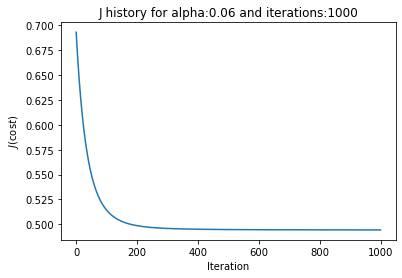

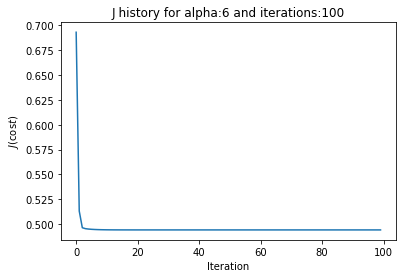

In [ ]:
plt.plot(j_histroy_1)
plt.xlabel("Iteration")
plt.ylabel("$J(\cost)$")
plt.title(f'J history for alpha:{alpha} and iterations:{num_iters}')
plt.show()
plt.plot(j_histroy_2)
plt.xlabel("Iteration")
plt.ylabel("$J(\cost)$")
plt.title(f'J history for alpha:{alpha1} and iterations:{num_iters1}')
plt.show()

In [ ]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_test_pred_soft = h(X_test, theta_2)

y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.3088, hard R^2 0.1493, accuracy 0.82


In [ ]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_test_pred_soft = h(X_train, theta_2)

y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_train, y_test_pred_soft)
test_rsq_hard = r_squared(y_train, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_train).astype(int).sum() / y_train.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.2568, hard R^2 0.0134, accuracy 0.79


**Conclusion:**

for the take-home exercise, the initial step we set the X and y value before training. in the same way as in example. I 
first fill the missing values, according to the ratio. After that there is no missing value

The second step was to convert binary categorical into numerical value. while converting the value on column i got more than 
2 category. In that case, we should not use replace to 0 ,1,2. This will cause problem because while training the model might
treat as the priority order so, in that case either we have to use the Label Encoder so that we can seperate the catergory.
or seeing the column i decide to drop the column.

for, training i finally, split the dataset to x_train,x_test,y_train,y_test and made dataset ready for training.

when everything is finalizdd for training. i started with small value of alpha and leads to higher value. I firstly selected
0.06 and secondly i select 6 from 1000 iters to 100 iters. finally, plotting the results i was confirm that the cost
function is being reduced to the lowest possible value. and Finally got the training accuracy as 79% where as on testing accuracy i got 82%.
